# SageMaker: Analysis and model training on the Iris dataset

## Download and read the dataset

In [1]:
import urllib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# For attributes and the class, see: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
# For the data, see: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
download_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
file_name = "iris.data"
urllib.request.urlretrieve (download_url, file_name)

('iris.data', <http.client.HTTPMessage at 0x7f7ac95413c8>)

In [3]:
# Read the data into Panda dataframe
df = pd.read_csv('./{}'.format(file_name), names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

## Inspect the data and perform some simple analysis

In [4]:
# First few observations
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [5]:
# Number of observations
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [6]:
# Number of classes / species
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# Summary of attributes, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Some statistics - useful or not?
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [9]:
# Possibly more useful - mean values grouped by the species
df.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

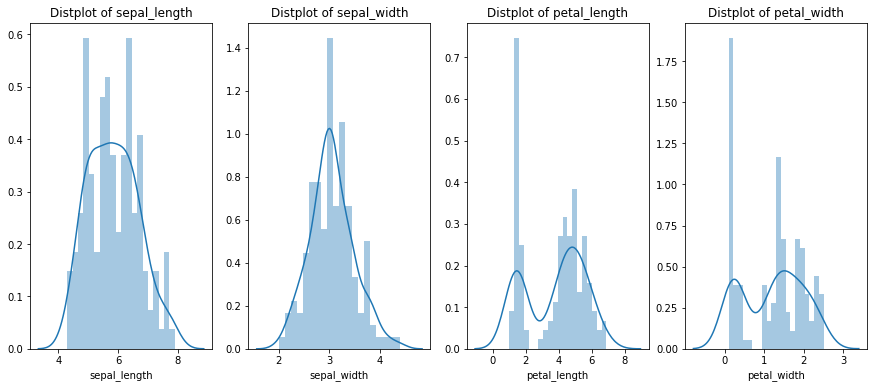

In [10]:
# Distribution of values for each attribute
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['sepal_length' , 'sepal_width' , 'petal_length', 'petal_width']:
    n += 1
    plt.subplot(1 , 4 , n)
    #plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## Look for relationships and correlation

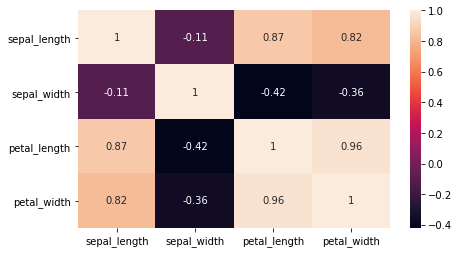

In [11]:
# Correlation heatmap - petal length and width look to be most associated
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True)
plt.show()

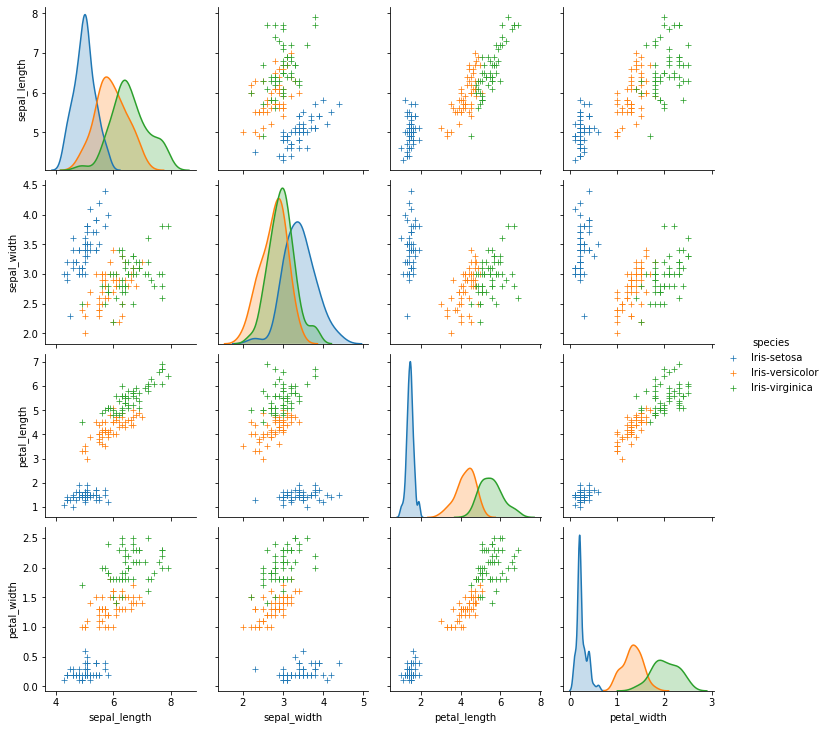

In [12]:
# An alternative correlation view - shows the strong association between petal length and width
g = sns.pairplot(df, hue='species', markers='+')
plt.show()

# Classify using the scikit-learn K-Nearest Neighbor algorithm

## Prepare the training and test data

In [13]:
# Create training and test dataframes based on a random 70/30 split
train_data, test_data = np.split(df.sample(frac=1, random_state=np.random.RandomState()), [int(0.7 * len(df))])

## Create a knn model using the training data

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Declare knn classifer; classify based on most common classification of 3 nearest neighbours
knn = KNeighborsClassifier(n_neighbors=3)

# Train knn model
knn.fit(train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train_data["species"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Predict species using the model and the test data

In [15]:
# Predict using the model and the test data
preds_array = knn.predict(test_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Convert the array to a dataframe with a single column called pred
preds_df = pd.DataFrame(preds_array, columns=['prediction'])

# Add the pred dataframe to the test dataframe by simply placing side by side
combined_df = test_data.reset_index(drop=True).join(preds_df)

## Review the predictions

In [16]:
# Predictions look good compared to the known class
combined_df.head(20)

sepal_length  sepal_width  petal_length  petal_width          species  \
0            5.7          3.0           4.2          1.2  Iris-versicolor   
1            4.9          3.1           1.5          0.1      Iris-setosa   
2            4.7          3.2           1.3          0.2      Iris-setosa   
3            4.6          3.4           1.4          0.3      Iris-setosa   
4            6.4          2.8           5.6          2.1   Iris-virginica   
5            4.8          3.4           1.9          0.2      Iris-setosa   
6            5.7          2.9           4.2          1.3  Iris-versicolor   
7            5.4          3.9           1.3          0.4      Iris-setosa   
8            5.0          3.4           1.6          0.4      Iris-setosa   
9            6.6          3.0           4.4          1.4  Iris-versicolor   
10           7.2          3.0           5.8          1.6   Iris-virginica   
11           5.4          3.4           1.7          0.2      Iris-setosa   
12           5.4          3.7           1.5          0.2      Iris-setosa   
13           6.5          2.8           4.6          1.5  Iris-versicolor   
14           6.4          3.2           4.5          1.5  Iris-versicolor   
15           5.1          3.8           1.9          0.4      Iris-setosa   
16           7.3          2.9           6.3          1.8   Iris-virginica   
17           6.4          2.9           4.3          1.3  Iris-versicolor   
18           6.2          2.9           4.3          1.3  Iris-versicolor   
19           5.1          3.5           1.4          0.3      Iris-setosa   

         prediction  
0   Iris-versicolor  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4    Iris-virginica  
5       Iris-setosa  
6   Iris-versicolor  
7       Iris-setosa  
8       Iris-setosa  
9   Iris-versicolor  
10   Iris-virginica  
11      Iris-setosa  
12      Iris-setosa  
13  Iris-versicolor  
14  Iris-versicolor  
15      Iris-setosa  
16   Iris-virginica  
17  Iris-versicolor  
18  Iris-versicolor  
19      Iris-setosa

In [17]:
# Prediction of species is largely correct compared to the observed species
pd.crosstab(combined_df['species'], combined_df['prediction'], rownames=['Actual species'], colnames=['Predicted species'])

Predicted species  Iris-setosa  Iris-versicolor  Iris-virginica
Actual species                                                 
Iris-setosa                 17                0               0
Iris-versicolor              0               15               0
Iris-virginica               0                1              12

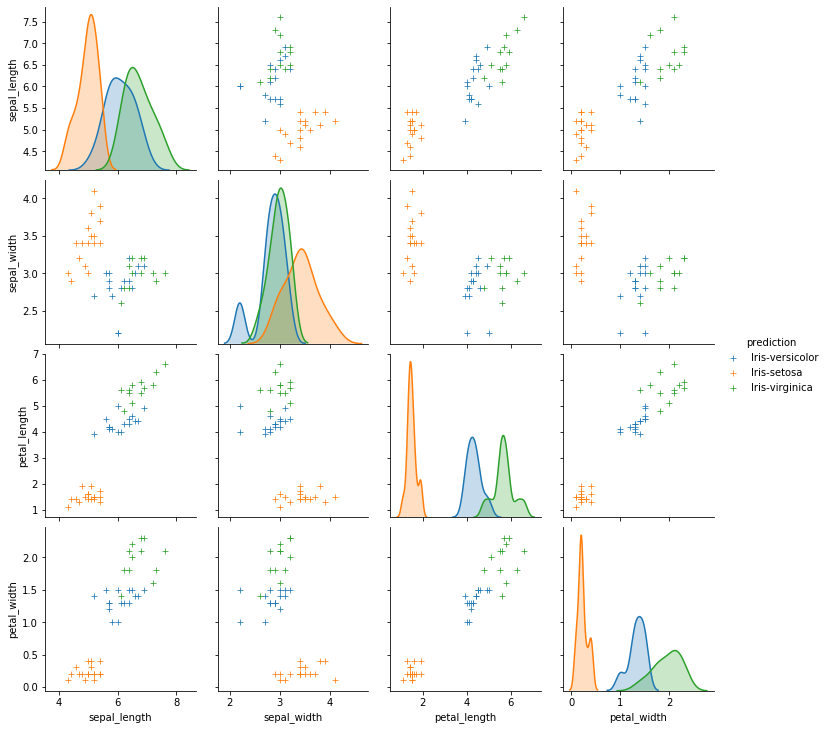

In [18]:
# Visually, the predictions show what we would expect when compared with the training data pairplot above
sns.pairplot(combined_df, hue='prediction', markers='+')
plt.show()

# Classify using the SageMaker k-nearest neighbour algorithm

## Prepare the training and test data

In [19]:
# Reload CSV data into a Panda dataframe
df = pd.read_csv('./{}'.format(file_name), names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Remap species values to integers
df['species'] = df['species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Move species column to first position
df = pd.concat([df['species'], df.drop(['species'], axis=1)], axis=1)

# Create training and test dataframes based on a random 70/30 split
train_data, test_data = np.split(df.sample(frac=1, random_state=np.random.RandomState()), [int(0.7 * len(df))])

## Create a knn model using the training data

In [20]:
import boto3
from datetime import datetime
import sagemaker
from sagemaker import get_execution_role
from sagemaker.predictor import csv_serializer, json_deserializer
from sagemaker.amazon.amazon_estimator import get_image_uri

# S3 config
bucket = 'iris-2020'
train_fname = 'iris-train.csv'
test_fname = 'iris-test.csv'
output_path = 's3://{}/output'.format(bucket)

# Save training and test data to local notebook instance (without indexes and headers)
train_data.to_csv(train_fname, index=False, header=False)
test_data.to_csv(test_fname, index=False, header=False)

# Save training and test data to S3
boto3.Session().resource('s3').Bucket(bucket).Object("{}/{}".format('train', train_fname)).upload_file(train_fname)
boto3.Session().resource('s3').Bucket(bucket).Object("{}/{}".format('test', test_fname)).upload_file(test_fname)

# Training config
job_name = 'iris-job-{}'.format(datetime.now().strftime("%Y%m%d%H%M%S"))

# Declare knn estimator
knn = sagemaker.estimator.Estimator(get_image_uri(boto3.Session().region_name, "knn"),
                                        get_execution_role(),
                                        train_instance_count=1,
                                        train_instance_type='ml.m4.xlarge',
                                        output_path=output_path,
                                        sagemaker_session=sagemaker.Session())

# Set mandatory hyperparameters; classify based on most common classification of 3 nearest neighbours
knn.set_hyperparameters(predictor_type='classifier',
                           feature_dim=4,
                           k=3,
                           sample_size=len(train_data))

# Define the data type and paths to the training and test data
content_type = "text/csv"
train_input = sagemaker.session.s3_input(s3_data="s3://{}/{}/".format(bucket, 'train'), content_type=content_type)
test_input = sagemaker.session.s3_input(s3_data="s3://{}/{}/".format(bucket, 'test'), content_type=content_type)

# Train the knn model with just training data
knn.fit({'train': train_input},  job_name=job_name)

# Train the knn model with training and validation data
# knn.fit({'train': train_input, 'test': test_input},  job_name=job_name)

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2020-11-19 13:11:57 Starting - Starting the training job...
2020-11-19 13:12:00 Starting - Launching requested ML instances......
2020-11-19 13:13:15 Starting - Preparing the instances for training......
2020-11-19 13:14:23 Downloading - Downloading input data......
2020-11-19 13:15:14 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/19/2020 13:15:38 INFO 139720084928320] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'index_metric': u'L2', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'feature_dim': u'auto', u'faiss_index_ivf_nlists': u'auto', u'epochs': u'1', u'index_type': u'faiss.Flat', u'_faiss_index_nprobe': u'5', u'_kvstore': u'dist_async', u'_num_kv_servers': u'1', u'mini_batch_size': u'5000'}
[11/19/2020 13:15:38 INFO 139720084928320] Merging with provided configuration from /opt

## Deploy the model on a SageMaker endpoint

In [21]:
# Deploy the model to a Sagemaker endpoint
knn_predictor = knn.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')
knn_predictor.serializer = csv_serializer
knn_predictor.deserializer = json_deserializer

-------------------!

## Predict species using the model and our test data

In [22]:
# Convert the test dataframe into an array and drop the species column on the fly
test_data_array = test_data.drop(['species'], axis=1).values

# Predict using the model and the test data
preds = knn_predictor.predict(test_data_array)

# Predict using the model and one set of flower values
# preds = knn_predictor.predict([4.8, 3.0, 1.4, 0.1])

# Convert JSON predictions to an array
preds_array = np.array([preds['predictions'][i]['predicted_label'] for i in range(len(preds['predictions']))])

# Convert the array to a dataframe with a single column called pred
preds_df = pd.DataFrame(preds_array, columns=['prediction'])

# Add the pred dataframe to the test dataframe by simply placing side by side
combined_df = test_data.reset_index(drop=True).join(preds_df)

# Remap species integers back to original values
combined_df['species'] = combined_df['species'].replace({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})
combined_df['prediction'] = combined_df['prediction'].replace({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


## Review the predictions

In [23]:
# As with the previous model above, predictions look good compared to the known class
combined_df.head(20)

species  sepal_length  sepal_width  petal_length  petal_width  \
0       Iris-setosa           5.0          3.5           1.3          0.3   
1    Iris-virginica           6.4          2.7           5.3          1.9   
2   Iris-versicolor           6.0          2.9           4.5          1.5   
3       Iris-setosa           5.0          3.2           1.2          0.2   
4   Iris-versicolor           5.6          2.7           4.2          1.3   
5       Iris-setosa           5.0          3.4           1.5          0.2   
6       Iris-setosa           5.3          3.7           1.5          0.2   
7       Iris-setosa           5.8          4.0           1.2          0.2   
8    Iris-virginica           6.3          2.7           4.9          1.8   
9    Iris-virginica           6.4          3.1           5.5          1.8   
10  Iris-versicolor           5.0          2.0           3.5          1.0   
11   Iris-virginica           7.4          2.8           6.1          1.9   
12  Iris-versicolor           6.1          2.9           4.7          1.4   
13      Iris-setosa           5.0          3.4           1.6          0.4   
14   Iris-virginica           6.1          3.0           4.9          1.8   
15      Iris-setosa           5.4          3.9           1.7          0.4   
16   Iris-virginica           6.2          2.8           4.8          1.8   
17   Iris-virginica           6.7          2.5           5.8          1.8   
18  Iris-versicolor           6.2          2.2           4.5          1.5   
19  Iris-versicolor           5.9          3.2           4.8          1.8   

         prediction  
0       Iris-setosa  
1    Iris-virginica  
2   Iris-versicolor  
3       Iris-setosa  
4   Iris-versicolor  
5       Iris-setosa  
6       Iris-setosa  
7       Iris-setosa  
8    Iris-virginica  
9    Iris-virginica  
10  Iris-versicolor  
11   Iris-virginica  
12  Iris-versicolor  
13      Iris-setosa  
14   Iris-virginica  
15      Iris-setosa  
16   Iris-virginica  
17   Iris-virginica  
18  Iris-versicolor  
19  Iris-versicolor

In [24]:
# Prediction of species is largely correct compared to the observed species
pd.crosstab(combined_df['species'], combined_df['prediction'], rownames=['Actual species'], colnames=['Predicted species'])

Predicted species  Iris-setosa  Iris-versicolor  Iris-virginica
Actual species                                                 
Iris-setosa                 12                0               0
Iris-versicolor              0               16               0
Iris-virginica               0                1              16

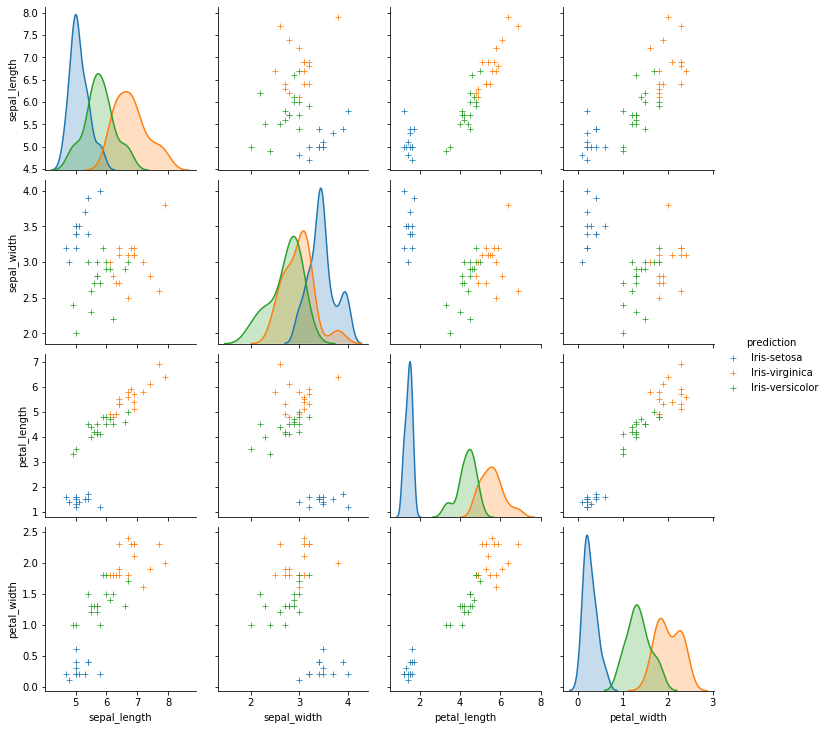

In [25]:
# Visually, the predictions show what we would expect when compared with the training data pairplot higher up above
sns.pairplot(combined_df, hue='prediction', markers='+')
plt.show()

## Delete the endpoint (to avoid running up a big bill)

In [26]:
sagemaker.Session().delete_endpoint(knn_predictor.endpoint)

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
